# Homework 5: Confidence Intervals, the Bootstrap, and Autograders
***

**Name**: 

**Section**: (001 or 002)
***

This assignment is due on Moodle by **5pm on Friday November 10th**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/chrisketelsen/csci3022/blob/master/resources/syllabus.md#collaboration-policy).  

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

In [45]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
%matplotlib inline

### [20 points] Problem 1 - Alcohol Content of Red vs White Wine 
***

Load the data in $\texttt{winequality-red.csv}$ and $\texttt{winequality-white.csv}$ into Pandas DataFrames.  A description of this dataset can be found on [Berkeley's Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wine+Quality). The characteristic that we'll be interested in is the wine's alcohol content.  

In [46]:
dfRed = pd.read_table("winequality-red.csv", sep=";")
dfWhite = pd.read_table("winequality-white.csv", sep=";")

**Part A**: Are we justified in using the assumptions of the Central Limit Theorem in our analysis of estimates of the mean of the data?  Justify your response. 

We are justified because the number of samples for each wine is greater than 30. They both are similar types of data so they share the same distribution properties. Therefore, we can compare the estimates of mean justifiably. 

**Part B**: Compute a 95% confidence interval for the mean of the red wine's alcohol content.  Separately, compute a 95% confidence interval for the mean of the white wine's alcohol content. Do all computations in Python. 

In [47]:
redRight = np.mean(dfRed["alcohol"])+1.96*np.std(dfRed["alcohol"])/np.sqrt(dfRed["alcohol"].count())
redLeft = np.mean(dfRed["alcohol"])-1.96*np.std(dfRed["alcohol"])/np.sqrt(dfRed["alcohol"].count())

whiteRight = np.mean(dfWhite["alcohol"])+1.96*np.std(dfWhite["alcohol"])/np.sqrt(dfWhite["alcohol"].count())
whiteLeft = np.mean(dfWhite["alcohol"])-1.96*np.std(dfWhite["alcohol"])/np.sqrt(dfWhite["alcohol"].count())

print("Red Wine Alcohol Content Mean Confidence Interval: \n["+str(redLeft)+","+str(redRight)+"]")
print("White Wine Alcohol Content Mean Confidence Interval: \n["+str(whiteLeft)+","+str(whiteRight)+"]")

Red Wine Alcohol Content Mean Confidence Interval: 
[10.3707654131,10.4752008157]
White Wine Alcohol Content Mean Confidence Interval: 
[10.479806156,10.5487279396]


**Part C**: Compute the 95% confidence interval for the difference between the means of the alcohol content of red and white wine. 

In [48]:
diff = np.mean(dfWhite["alcohol"])-np.mean(dfRed["alcohol"])
ends = 1.96*np.sqrt(np.power(np.std(dfWhite["alcohol"]),2)/dfWhite["alcohol"].count()+np.power(np.std(dfRed["alcohol"]),2)/dfRed["alcohol"].count())

left = diff - ends
right = diff + ends

print("Mean Difference Confidence Interval: \n["+str(left)+","+str(right)+"]")

Mean Difference Confidence Interval: 
[0.0287200348647,0.153847831792]


**Part D**: Interpret the confidence interval you computed in **Part C** in one or two sentences.  Can you say that it's likely that there is a difference in mean alcohol content between red and white wine?  

I can say that it is likely there is a difference in mean alcohol content between red and white wine because the lowest end of the 95 % confidence interval is above 0. Since this means 95% of samples from red and white wine with the same respective size would have a difference between means that falls in this confidence interval (where the mean of red is larger than the mean of white), then it seems highly likely that a difference in mean alcohol content does exist overall. 

### [15 points] Problem 2: Election Polling
***

On the eve of an important senate seat election, a pollster polls a simple random sample of the population and asks which candidate they plan to vote for on the following day. In particular, the pollster asks if the respondents plan to vote for Candidate A, Candidate B, or some other candidate.  The results of the poll can be found in the following table: 

\begin{array}{ccc}
\hline 
\textrm{Candidate A} & \textrm{Candidate B} & \textrm{Other} \\
\hline 
1204 & 1099 & 205  \\
\hline 
\end{array}

**Part A**: Poll results are typically reported as a predicted **percentage** of the electorate plus or minus a margin of error, i.e. $\texttt{percentage} \pm \texttt{margin}$.  Express the poll results for Candidates A and B in the specified format at the 95% confidence level. 

In [49]:
n = 1204+1099+205
AProb = 1204/n
AMargin = 1.96*np.sqrt(AProb*(1-AProb)/n)
BProb = 1099/n
BMargin = 1.96*np.sqrt(BProb*(1-BProb)/n)

print("Candidate A: ^p = "+str(AProb)+", Za/2 = "+str(AMargin))
print("Candidate B: ^p = "+str(BProb)+", Za/2 = "+str(BMargin))

Candidate A: ^p = 0.4800637958532695, Za/2 = 0.0195531536174
Candidate B: ^p = 0.4381977671451356, Za/2 = 0.0194186536558


Candidate A: $48.00637958532695\% \pm 1.95531536174\%$

Candidate B: $43.81977671451356\% \pm 1.94186536558\%$

**Part B**: Express the poll results as 95% confidence intervals.  Based on these results, would it be responsible for a newspaper to definitely call the election for a particular candidate? Clearly justify your response. 

In [50]:
print("Candidate A: ["+str(AProb-AMargin)+","+str(AProb+AMargin)+"]")
print("Candidate B: ["+str(BProb-BMargin)+","+str(BProb+BMargin)+"]")

Candidate A: [0.460510642236,0.499616949471]
Candidate B: [0.418779113489,0.457616420801]


It would still be responsible for a newspaper to definitely call the election for candidate A. The confidence intervals for A and B don't have any overlap within the respective ranges. The highest end point for candidate B is still lower than the lowest end point for candidate A, so we can say with 95% confidence that candidate A would win. 

**Part C**: In the run-up to the next election, the pollster is designing a poll of a city council race between two relatively unknown candidates.  Without having any prior data, how many respondents does the pollster need responses from to guarantee that she will get at most a 2% margin of error at the 95% confidence level? Be sure to **clearly** justify your reasoning.  

**Hint**: Recall that when computing confidence intervals for proportions we use the actual sample proportions to approximate the variance.  How can you get a worst-case scenario estimate of the variance when the sample proportion is not known _a priori_? 


The margin of error at the 95% confidence level is found with $1.96\sqrt{\frac{p(1-p)}{n}}$ where p is the sub sample proportion and n is the sample size (number of responses). If we want to minimize the margin of error to be at most 2%, we will have to find the n that will give at most 2% marginal error when p(1-p) is the greatest. There are no other variables so we just need to figure these out. Using algebra and calculus, we can find the maximum of the parabola p(1-p). p(1-p) is an upward curved parabola so the maximum is at the p where the derivative of p(1-p) is 0. 
$\{p(1-p)\}' = \{p-p^2\}' = 1-2p = 0$


Therefore, the parabola's maximum is at p = 0.5.
So all we have to do is find the n that satisfies $1.96\sqrt{\frac{0.5\times0.5}{n}} \le 0.02$


\begin{align}
1.96\sqrt{\frac{0.5\times0.5}{n}} &\le 0.02 \\
\sqrt{\frac{0.25}{n}} &\le 0.010204081632\\
\frac{0.25}{n} &\le 0.00010412328 \\
2401.00004533 &\le n
\end{align}

So, we need at least 2402 responses to guarantee that the marginal error is at most 2% for the 95% confidence level.

### [15 points] Problem 3 - Have Opinions on Marijuana Legalization Changed? 
***

The General Social Survey (GSS) has been collecting demographic, behavioral, and attitudinal information since 1972 to monitor changes within the US and to compare the US to other nations. Support for the legalization of marijuana in the US is shown for 2010 and in 2016 in the following table:


\begin{array}{cccc}
\hline
\textrm{Year} & \textrm{Favor} & \textrm{Oppose} & \textrm{Total} \\ 
\hline
\textrm{2010} & \textrm{603} & \textrm{656} & \textrm{1259} \\
\textrm{2016} & \textrm{1126} & \textrm{717} & \textrm{1843} \\
\hline
\end{array}


**Part A**: Find a 95% confidence interval for the change in the proportion supporting marijuana legalization from 2010 to 2016. Use Python for all computations and show your work. 

In [51]:
n_10 = 1259
n_16 = 1843
p_10 = 603/n_10
p_16 = 1126/n_16
z_025 = 1.96*np.sqrt(p_10*(1-p_10)/n_10 + p_16*(1-p_16)/n_16)
print("Confidence Interval: ["+str(p_16-p_10-z_025)+","+str(p_16-p_10+z_025)+"]")

Confidence Interval: [0.0965557914398,0.167461892198]


**Part B**: Is it likely that the proportion supporting marijuana legalization changed between 2010 and 2016? Justify your conclusion using the ideas of statistical inference and your results from **Part A**. 

It is indeed likely that the proportion supporting marijuana legalization changed between 2010 and 2016. The 95% confidence interval from Part A shows that the lowest end of the interval is around 0.97. This is quite high above 0. The sample size is also very big, which gives me good confidence that the sample proportion is a good approximation of the population proportion.

### [20 points] Problem 4 - Exploring Confidence Intervals 
***

The so-called [Chi-squared](https://en.wikipedia.org/wiki/Chi-squared_distribution) distribution is important in several statistical tests.  It's also fairly asymmetric, and thus interesting for investigating confidence intervals.  It is implemented in scipy.stats as [chi2](https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.stats.chi2.html). 


In [52]:
from scipy.stats import chi2

**Part A**: Complete the following code cell to plot a histogram of realizations from the Chi-squared distribution with parameter $K=3$. 

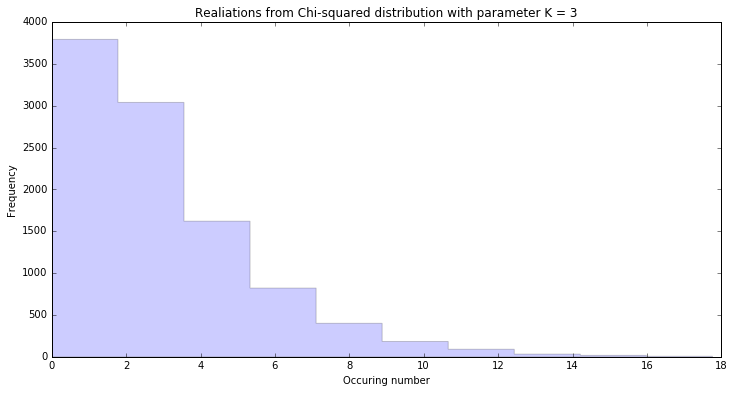

In [53]:
k = 3 
x = chi2.rvs(k, size=10000)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
ax.hist(x, histtype='stepfilled', alpha=0.2)
plt.ylabel("Frequency")
plt.xlabel("Occuring number")
plt.title("Realiations from Chi-squared distribution with parameter K = 3")
plt.show()

**Part B**: Look up the mean and variance of the Chi-squared distribution with parameter $k=3$ and report them here. 

In [54]:
true_mean = chi2.mean(k)
true_var = chi2.var(k)
print("True Mean: ", true_mean, ", True Variance: ", true_var)

True Mean:  3.0 , True Variance:  6.0


**Part C**: In this part you'll write a function to investigate the _coverage properties_ of a confidence interval for the mean of the Chi-squared distribution. Complete the following function to randomly sample $m=500$ sample means with sample size $n=100$ for the Chi-squared distribution with parameter $k=3$.  For each random sample, compute the 95% confidence interval for the mean.  Your function should do two things: 

1. Report the proportion of confidence intervals that successfully cover the true mean of the distribution 
2. Make a plot of 50 randomly selected confidence intervals. Overlay the intervals on the line $y=\mu$ where $\mu$ is the true mean of the distribution. Color confidence intervals black if they cover the true mean, and red if they don't.  

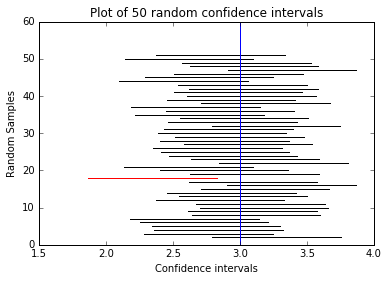

In [55]:
def confidence_intervals(m=500, n=100):
    ci = []
    cover = 0
    for i in range(m):
        x2 = chi2.rvs(k, size=n)
        chi_mean = np.mean(x2)
        chi_margin = 1.96*chi2.std(k)/np.sqrt(n)
        if chi_mean - chi_margin <= true_mean and true_mean <= chi_mean + chi_margin:
            cover = cover + 1
        ci.append((chi_mean - chi_margin, chi_mean + chi_margin))
    index = np.random.choice(m, 50, replace=False)
    y = 1
    for j in index:
        if ci[j][0] <= true_mean and true_mean <= ci[j][1]:
            plt.plot([ci[j][0],ci[j][1]], [y+1, y+1], color='black', linewidth=1.0)
        else:
            plt.plot([ci[j][0],ci[j][1]], [y+1, y+1], color='red', linewidth=1.0)
        y = y + 1
    plt.axvline(x=true_mean)    
    plt.xlabel("Confidence intervals")
    plt.ylabel("Random Samples")
    plt.title("Plot of 50 random confidence intervals")
    plt.show()
    
confidence_intervals()

**Part D**: Does the proportion of confidence intervals that cover the true mean of the distribution agree with the theory described in class?  Justify your conclusion. 

In class we said that "In repeated sampling, 95% of all CIs obtained from sampling will actually contain the true population mean". We see in the graph 50 random confidence intervals from sampling. So, in theory, 47.5 of the confidence intervals should cover the true mean. After doing a couple runs, I saw that the number of confidence intervals that cover the true mean in the 50 random confidence intervals ranged from 6 to 0, averaging between 2 and 3. Therefore, this proportion agrees with the theory described in class.

### [20 points] Problem 5 - Bootstrapped Confidence Intervals 
***

An important feature in online advertising is the so-called _dwell time_, or the amount of time that a user spends viewing a particular piece of content. The data in dwell_times.csv contains the dwell times (in minutes) for 500 randomly selected users viewing an article on a website.  


**Part A**: Read in the data from dwell_times.csv and create a frequency histogram with 20 bins. 

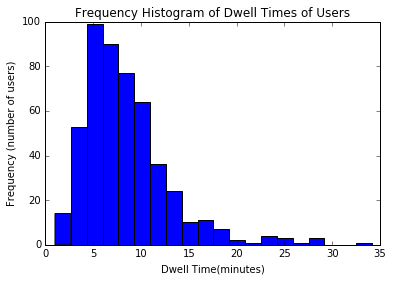

In [56]:
dfDwell = pd.read_csv("dwell_times.csv")
plt.hist(dfDwell["dwell time"], bins = 20)
plt.xlabel("Dwell Time(minutes)")
plt.ylabel("Frequency (number of users)")
plt.title("Frequency Histogram of Dwell Times of Users")
plt.show()

**Part B**: Complete the function dwell_mean below to create an empirical bootstrapped confidence interval at the 95% confidence level for the mean dwell time.  Use at least 5000 bootstrap resamples. In addition to returning the confidence interval, your function should also plot a histogram of the bootstrap resample means, along with some graphical representation of the 95% confidence interval. 

array([ 8.05712422,  8.86095124])

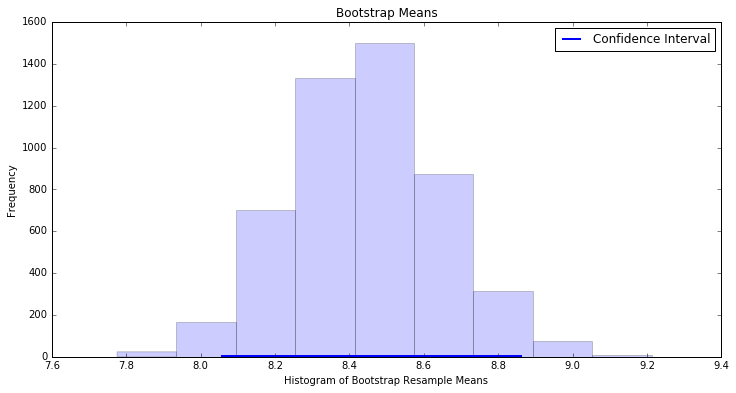

In [57]:
def dwell_mean(df, num_boots=5000, isPlot=False):
    means = []
    for i in range(num_boots):
        means.append(np.mean(np.random.choice(df["dwell time"], 500)))
    L = np.percentile(means,2.5)
    U = np.percentile(means,97.5)
    CI = np.array([L, U])
    
    if isPlot: 
        # TODO plot histogram 
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
        ax.hist(means, alpha=0.2)
        CI_line, = ax.plot([L, U], [5, 5], 'k-', lw=2, color='blue')
        CI_line.set_label('Confidence Interval')
        plt.xlabel("Histogram of Bootstrap Resample Means")
        plt.ylabel("Frequency")
        plt.title("Bootstrap Means")
        ax.legend()
    return CI 
dwell_mean(dfDwell, num_boots=5000, isPlot=True)

**Part C**: Suppose you are told that the actual dwell times in dwell_times.csv were sampled from a [LogNormal]() distribution with parameters $\mu=2$ and $\sigma^2 = \frac{1}{4}$. Go to the linked Wiki page and read about the LogNormal distribution.  Then compute the exact **mean**, **median**, and **standard deviation** of the distribution for the given parameters and report them here. 

The mean is found using the equation: exp($\mu + \frac{\sigma ^2}{2}$). $\mu=2$ and $\sigma^2 = \frac{1}{4}$ so exp(2 + $\frac{1}{8}$) = exp($\frac{17}{8}$) = $e^\frac{17}{8}$

The median is found using the equation: exp($\mu$). So, the median is $e^2$

The standard deviation is found using the equation: $\sqrt{[\exp(\sigma^2)-1] \exp(2\mu+\sigma^2)}$. So, the standard deviation is $\sqrt{(e^\frac{1}{8} - 1) \times e^\frac{33}{8}}$ = $\sqrt{e^\frac{34}{8}-e^\frac{33}{8}}$

**Part D**: Use the true standard deviation of the distribution to compute a traditional 95% confidence interval for the sample mean of the dwell time data.  Compare the traditional 95% confidence interval to the bootstrapped 95% confidence interval. Do both confidence intervals cover the true mean?  Do both confidence intervals have roughly the same width?   

In [58]:
upper = float(np.mean(dfDwell["dwell time"]) + np.std(dfDwell["dwell time"])/np.sqrt(dfDwell.count()))
lower = float(np.mean(dfDwell["dwell time"]) - np.std(dfDwell["dwell time"])/np.sqrt(dfDwell.count()))
print("Traditional 95% confidence interval of mean: [", str(lower), ",",str(upper),"]")
print("True Mean: ", np.mean(dfDwell["dwell time"]))

Traditional 95% confidence interval of mean: [ 8.24030185113638 , 8.6499785282886 ]
True Mean:  8.44514018971249


Both confidence intervals cover the true mean. However, the bootstrapped confidence interval is slightly wider in width. This shows that the bootstrapped interval will be more accurate than the traditional confidence interval.

**Part E**: Complete the function dwell_stdev below to create an empirical bootstrapped confidence interval at the 95% confidence level for the standard deviation of dwell time.  Use at least 5000 bootstrapped resamples. In addition to returning the confidence interval, your function should also plot a histogram of the bootstrap resample standard deviations including some graphical indication of the 95% confidence interval.  

array([ 4.04683019,  5.11798782])

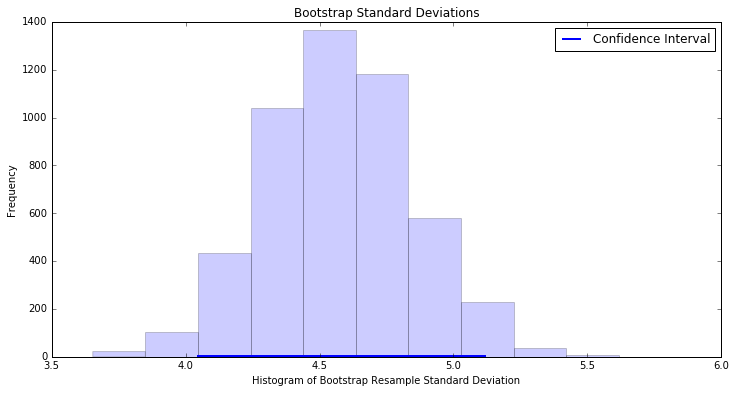

In [59]:
def dwell_stdev(df, num_boots=5000, isPlot=False):
    stds = []
    for i in range(num_boots):
        stds.append(np.std(np.random.choice(df["dwell time"], 500)))
    L = np.percentile(stds,2.5)
    U = np.percentile(stds,97.5)
    CI = np.array([L, U])
    
    if isPlot: 
        # TODO plot histogram 
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
        ax.hist(stds, alpha=0.2)
        CI_line, = ax.plot([L, U], [5, 5], 'k-', lw=2, color='blue')
        CI_line.set_label('Confidence Interval')
        plt.xlabel("Histogram of Bootstrap Resample Standard Deviation")
        plt.ylabel("Frequency")
        plt.title("Bootstrap Standard Deviations")
        ax.legend()
    return CI 
dwell_stdev(dfDwell, num_boots=5000, isPlot=True)

**Part F**: Does the true standard deviation of the distribution fall inside your 95% bootstrapped confidence interval? 

In [60]:
print("True standard deviation: ", np.std(dfDwell["dwell time"]))

True standard deviation:  4.58032449454299


The true standard deviation falls inside my 95% bootstrapped confidence interval.

**Part G**: Complete the function dwell_med below to create an empirical bootstrapped confidence interval at the 95% confidence level for the median dwell time.  Use at least 5000 bootstrap resamples. In addition to returning the confidence interval, your function should also plot a histogram of the bootstrap resample medians including some graphical indication of the 95% confidence interval.  

array([ 7.04544084,  8.03335217])

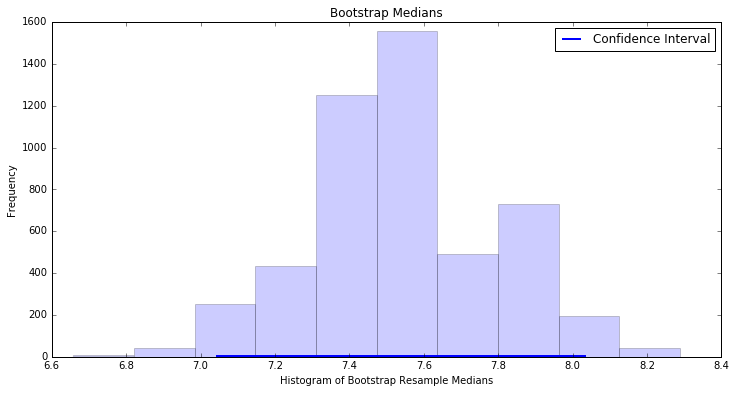

In [61]:
def dwell_med(df, num_boots=5000, isPlot=False):
    meds = []
    for i in range(num_boots):
        meds.append(np.median(np.random.choice(df["dwell time"], 500)))
    L = np.percentile(meds,2.5)
    U = np.percentile(meds,97.5)
    CI = np.array([L, U])
    
    if isPlot: 
        # TODO plot histogram 
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
        ax.hist(meds, alpha=0.2)
        CI_line, = ax.plot([L, U], [5, 5], 'k-', lw=2, color='blue')
        CI_line.set_label('Confidence Interval')
        plt.xlabel("Histogram of Bootstrap Resample Medians")
        plt.ylabel("Frequency")
        plt.title("Bootstrap Medians")
        ax.legend()
    return CI 
dwell_med(dfDwell, num_boots=5000, isPlot=True)

**Part H**: Does the true median of the distribution fall inside your 95% bootstrapped confidence interval? 

In [62]:
print("True median: ", np.median(dfDwell["dwell time"]))

True median:  7.51162298914


The true median falls inside my 95% bootstrapped confidence interval.

### [15 points] Problem 6 - Autograding Simulation Homework 
***

Suppose that you are the grader for an Introduction to Data Science course and your boss has asked you to write an autograder for a homework problem on simulation.  Specifically, students have been asked to write a simulation to estimate the expected number of rolls it will take until doubles are rolled with a pair of fair, six-sided dice (i.e. until both dice show the same value).  The students have been asked to structure their code so that it runs many trials of the experiment and returns the sample mean of the trials, as well as an array containing the result of each individual trial. 

The solutions submitted by three students in the course are given below. 

In [63]:
def student1(num_trials=5000):
    t = np.zeros(num_trials)
    for ii in range(num_trials):
        ctr = 0
        while np.random.choice([1,2,3,4,5,6]) != np.random.choice([1,2,3,4,5,6]):
            ctr += 1 
        t[ii] = ctr 
    return np.mean(t), t

def student2(num_trials=5000):
    t = np.zeros(num_trials)
    for ii in range(num_trials):
        ctr = 1
        while int(6*np.random.uniform(0,1)+1) != int(6*np.random.uniform(0,1)+1):
            ctr += 1 
        t[ii] = ctr 
    return np.mean(t), t

def student3(num_trials=5000):
    t = np.random.exponential(6, size=num_trials)
    return np.mean(t), t 

Now, you landed this job at the last minute, and your probability theory is a little rusty.  Luckily, your boss has given you her solution to the problem which is shown below: 

In [64]:
def prof(num_trials=5000):
    t = np.random.geometric(1/6, size=num_trials)
    return np.mean(t), t
prof()

(6.0838000000000001, array([7, 3, 8, ..., 3, 6, 1]))

Knowing that your probability theory is rusty, your boss has suggested that your autograder be constructed solely based on confidence intervals to compare the students' estimates of the expected value of the experiment to her own estimate.  Finally, although there are only examples from three students above, there are actually more than 100 students in the course, so tailoring your tests to features of individual students' code is out of the question. 

**Part A**: Complete the function autograder below, which takes in the realizations of the trials from your professor's code and one of the students' codes, as well as the $\alpha$ for a $100(1-\alpha)\%$ confidence interval and returns a string indicating whether the student passed or failed the test. **Clearly** indicate what statistical test(s) your autograder is using and why this is a good idea.  Then demonstrate the use of your autograder to grade the three student solutions above based on a 95% confidence level. 

In [65]:
from scipy.stats import norm
def autograder(pf, st, alpha=0.05):
    mean, answer = prof()
    student = st()[0]
    z = norm.ppf(1-alpha/2)
    upper = mean + z*np.std(answer)/np.sqrt(len(answer))
    lower = mean - z*np.std(answer)/np.sqrt(len(answer))
    if lower <= student <= upper:
        return "Passed"
    else:
        return "Failed"
print("Student 1", autograder(pf=prof,st=student1))
print("Student 2", autograder(pf=prof,st=student2))
print("Student 3", autograder(pf=prof,st=student3))

Student 1 Failed
Student 2 Passed
Student 3 Passed


The method I used is to find the traditional 95% confidence interval of the mean from the teacher's solution. Then I checked to find if the function from each student calculated a mean that fell into the confidence interval. This would make sense because it wouldn't be fair to simply do an exact comparison with the teacher's mean because this is a simulation, so the exact same results will not often be duplicated. Therefore, we need to set a specific range for possible answers. Using this statistic method to create a valid range, we can check to see if the function calculates the mean correctly.

**[Extra Credit] Part B**: You realize that tests based solely on the estimate of the mean are not robust.  Come up with a better autograder that, again using tests based on confidence intervals, compares the students' solutions to the professor's solutions on statistical properties beyond just the mean. Again, **clearly** motivate the features of your autograder based on theory developed in class.    

In [66]:
def autograder(pf, st, alpha=0.05):
    answer = prof()[1]
    student = st()[1]
    means = []
    stds= []
    meds = []
    pass_means = False
    pass_stds = False
    pass_meds = False
    for i in range(500):
        meds.append(np.median(np.random.choice(answer, len(answer))))
        stds.append(np.std(np.random.choice(answer, len(answer))))
        means.append(np.mean(np.random.choice(answer, len(answer))))
    L_meds = np.percentile(meds,alpha/2)
    U_meds = np.percentile(meds,100-alpha/2)
    L_stds = np.percentile(stds,alpha/2)
    U_stds = np.percentile(stds,100-alpha/2)
    L_means = np.percentile(means,alpha/2)
    U_means = np.percentile(means,100-alpha/2)
    if L_meds <= np.median(student) <= U_meds:
        pass_meds = True
    if L_means <= np.mean(student) <= U_means:
        pass_means = True
    if L_stds <= np.std(student) <= U_stds:
        pass_stds = True
    # TODO 
    if pass_meds and pass_means and pass_stds:
        return "Passed"
    else:
        return "Failed"
print("Student 1", autograder(pf=prof,st=student1))
print("Student 2", autograder(pf=prof,st=student2))
print("Student 3", autograder(pf=prof,st=student3))

Student 1 Failed
Student 2 Passed
Student 3 Failed


Unfortunately, just checking the mean does not let us know if the actual distribution mimics that of the professor's solution. A student could have hardcoded an array and got lucky. Instead, we can use bootstrapping to figure out a 95% confidence interval for the standard deviation and median for the professor's answer as well. Then we can see if the student's trials' standard deviation and median fit in these confidence intervals as well. Only if all three statistic evaluations match can we give the student a passing grade on the function.